In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
# Function to extract Product Title
def get_title(soup):

    try:
       
        title = soup.find("span", attrs={"id":'productTitle'})
        
        
        title_value = title.text

        
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available



In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# Define functions to extract the necessary information
def get_title(soup):
    try:
        title = soup.find('span', {'id': 'productTitle'}).get_text().strip()
        return title
    except AttributeError:
        return None

def get_price(soup):
    try:
        price = soup.find('span', {'class': 'a-price-whole'})
        if price:
            return price.get_text().strip()
        else:
            return None
    except AttributeError:
        return None

def get_rating(soup):
    try:
        rating = soup.find('span', {'class': 'a-icon-alt'}).get_text().strip()
        return rating
    except AttributeError:
        return None

def get_review_count(soup):
    try:
        reviews = soup.find('span', {'id': 'acrCustomerReviewText'}).get_text().strip()
        return reviews
    except AttributeError:
        return None

def get_availability(soup):
    try:
        availability = soup.find('div', {'id': 'availability'}).get_text().strip()
        return availability
    except AttributeError:
        return None

# Additional features to scrape
def get_brand(soup):
    try:
        brand = soup.find('a', {'id': 'bylineInfo'}).get_text().strip()
        return brand
    except AttributeError:
        return None

def get_seller(soup):
    try:
        seller = soup.find('a', {'id': 'sellerProfileTriggerId'}).get_text().strip()
        return seller
    except AttributeError:
        return None

def get_images(soup):
    try:
        images = soup.find_all('img', {'class': 'a-dynamic-image'})
        image_urls = [img['src'] for img in images if img.get('src')]
        return image_urls
    except AttributeError:
        return None

# Main script to scrape product details
if __name__ == '__main__':
    
    HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
        'Accept-Language': 'en-US, en;q=0.5'
    }

    
    URL = "https://www.amazon.in/s?k=laptop&crid=3FD835NU1MCTA&sprefix=laptop%2Caps%2C242&ref=nb_sb_noss_2"

    
    webpage = requests.get(URL, headers=HEADERS)

    
    soup = BeautifulSoup(webpage.content, "html.parser")

    
    links = soup.find_all("a", attrs={'class': 'a-link-normal s-no-outline'})

   
    links_list = []

    
    for link in links:
        links_list.append(link.get('href'))

    
    d = {
        "title": [], "price": [], "rating": [], "reviews": [], "availability": [],
        "brand": [], "seller": [], "images": []
    }

    
    for link in links_list:
       
        new_webpage = requests.get("https://www.amazon.in" + link, headers=HEADERS)

        
        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

       
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))
        d['brand'].append(get_brand(new_soup))
        d['seller'].append(get_seller(new_soup))
        d['images'].append(get_images(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)

    
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df.dropna(subset=['title'], inplace=True)


    amazon_df.to_csv("amazon_laptop_data.csv", header=True, index=False)

   
   


In [46]:
amazon_df

,title,price,rating,reviews,availability,brand,seller,images
0,"Dell 15 Thin & Light Laptop, Core i5-1235U Pro...","47,990.",3.5 out of 5 stars,508 ratings,In stock,Visit the Dell Store,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/41srWtqYu...
1,"Chuwi HeroBook Plus 15.6"" FHD Laptop, Intel Ce...","18,990.",3.7 out of 5 stars,"3,126 ratings",In stock,Visit the Chuwi Store,Chuwi India,[https://m.media-amazon.com/images/I/41X48B2qL...
2,(Refurbished) Lenovo ThinkPad 6th Gen Intel Co...,"15,398.",3.3 out of 5 stars,854 ratings,In stock,Visit the Amazon Renewed Store,Edify by Winuall,[https://m.media-amazon.com/images/I/31UMzvk2u...
3,"HP Laptop 15s, 12th Gen Intel Core i3, 15.6-in...","35,990.",4.0 out of 5 stars,"1,024 ratings",In stock,Visit the HP Store,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/41kZQHmar...
4,Lenovo IdeaPad Slim 1 Intel Core Celeron N4020...,"25,990.",3.7 out of 5 stars,220 ratings,In stock,Visit the Lenovo Store,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/41R17T05K...
5,"Lenovo IdeaPad 1 AMD Ryzen 5 5500U 15.6"" (39.6...","32,990.",4.0 out of 5 stars,"1,873 ratings",In stock,Visit the Lenovo Store,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/41n6UmDhU...
6,Lenovo [Smart Choice Ideapad Gaming 3 Laptop A...,"47,990.",4.0 out of 5 stars,678 ratings,In stock,Visit the Lenovo Store,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/415s5xSmV...
7,"Primebook 4G, 2024(New, WiFi+4G) Android Based...","14,790.",4.5 out of 5 stars,203 ratings,In stock,Visit the Primebook Store,Primebook India,[https://m.media-amazon.com/images/I/418zQJeLa...
8,"Lenovo LOQ 2024 Intel Core i5-13450HX 15.6"" (3...","86,990.",4.0 out of 5 stars,147 ratings,In stock,Visit the Lenovo Store,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/51eIFIHTk...
9,Acer Chromebook CB315-4H Intel Celeron N4500 (...,"15,990.",3.6 out of 5 stars,27 ratings,In stock,Brand: Acer,Clicktech Retail Private Ltd,[https://m.media-amazon.com/images/I/41bIj3-WG...


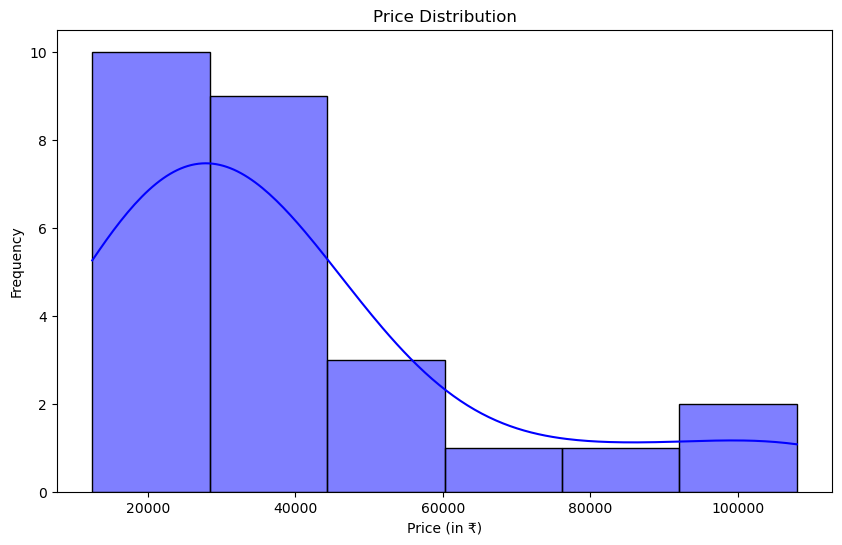

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


amazon_df['price'] = amazon_df['price'].apply(lambda x: float(x.replace(',', '').replace('₹', '').strip()) if isinstance(x, str) else x)

plt.figure(figsize=(10, 6))
sns.histplot(amazon_df['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (in ₹)')
plt.ylabel('Frequency')
plt.show()


In [34]:
pip install textblob


     -------------------------------------- 626.3/626.3 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [37]:
!pip install -U nltk
!python -m textblob.download_corpora


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\rveab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rveab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rveab\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rveab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\rveab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\rveab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


neutral    26
Name: review_sentiment, dtype: int64


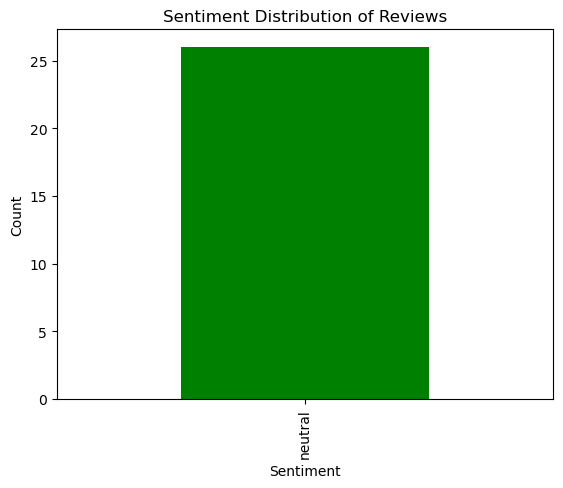

In [38]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(review):
    blob = TextBlob(review)
    sentiment = 'positive' if blob.sentiment.polarity > 0 else 'negative' if blob.sentiment.polarity < 0 else 'neutral'
    return sentiment


amazon_df['review_sentiment'] = amazon_df['reviews'].apply(get_sentiment)

print(amazon_df['review_sentiment'].value_counts())


import matplotlib.pyplot as plt

amazon_df['review_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


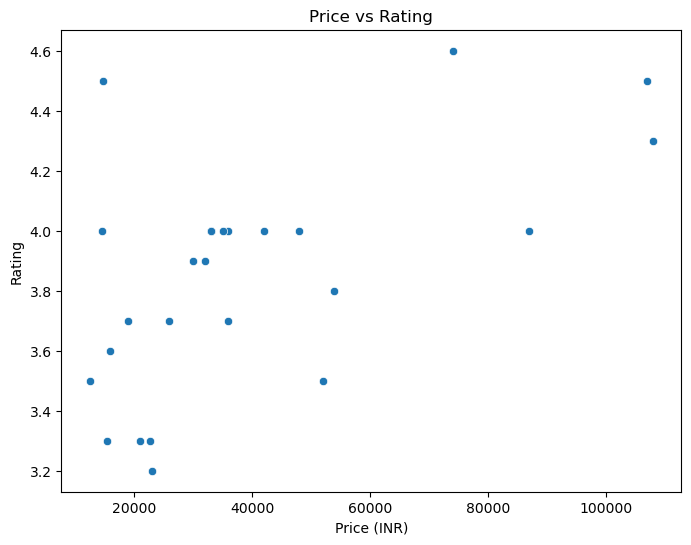

In [26]:

import seaborn as sns


amazon_df['price'] = pd.to_numeric(amazon_df['price'], errors='coerce')

# Scatter plot to visualize the relationship between price and rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='rating', data=amazon_df)
plt.title('Price vs Rating')
plt.xlabel('Price (INR)')
plt.ylabel('Rating')
plt.show()



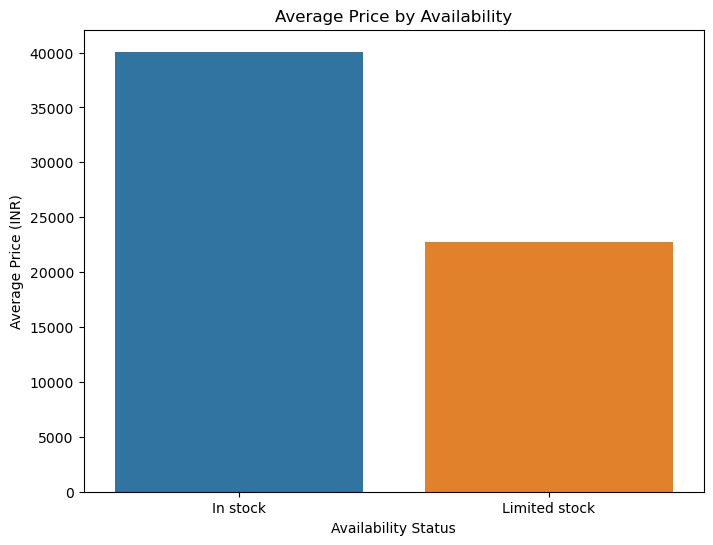

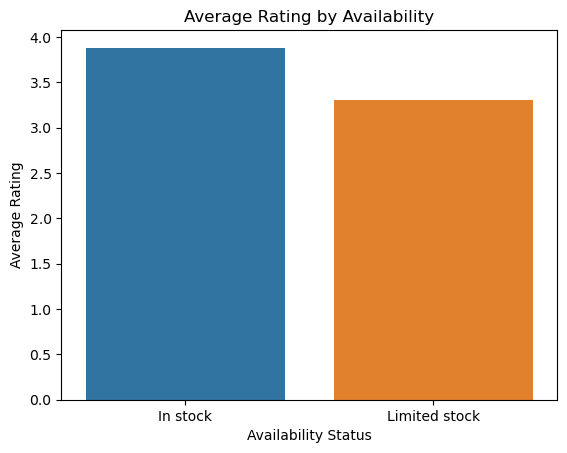

In [27]:

amazon_df['availability_status'] = amazon_df['availability'].apply(lambda x: 'In stock' if 'In stock' in str(x) else 'Limited stock')

availability_stats = amazon_df.groupby('availability_status').agg({'price': 'mean', 'rating': 'mean'}).reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='availability_status', y='price', data=availability_stats)
plt.title('Average Price by Availability')
plt.xlabel('Availability Status')
plt.ylabel('Average Price (INR)')
plt.show()


sns.barplot(x='availability_status', y='rating', data=availability_stats)
plt.title('Average Rating by Availability')
plt.xlabel('Availability Status')
plt.ylabel('Average Rating')
plt.show()


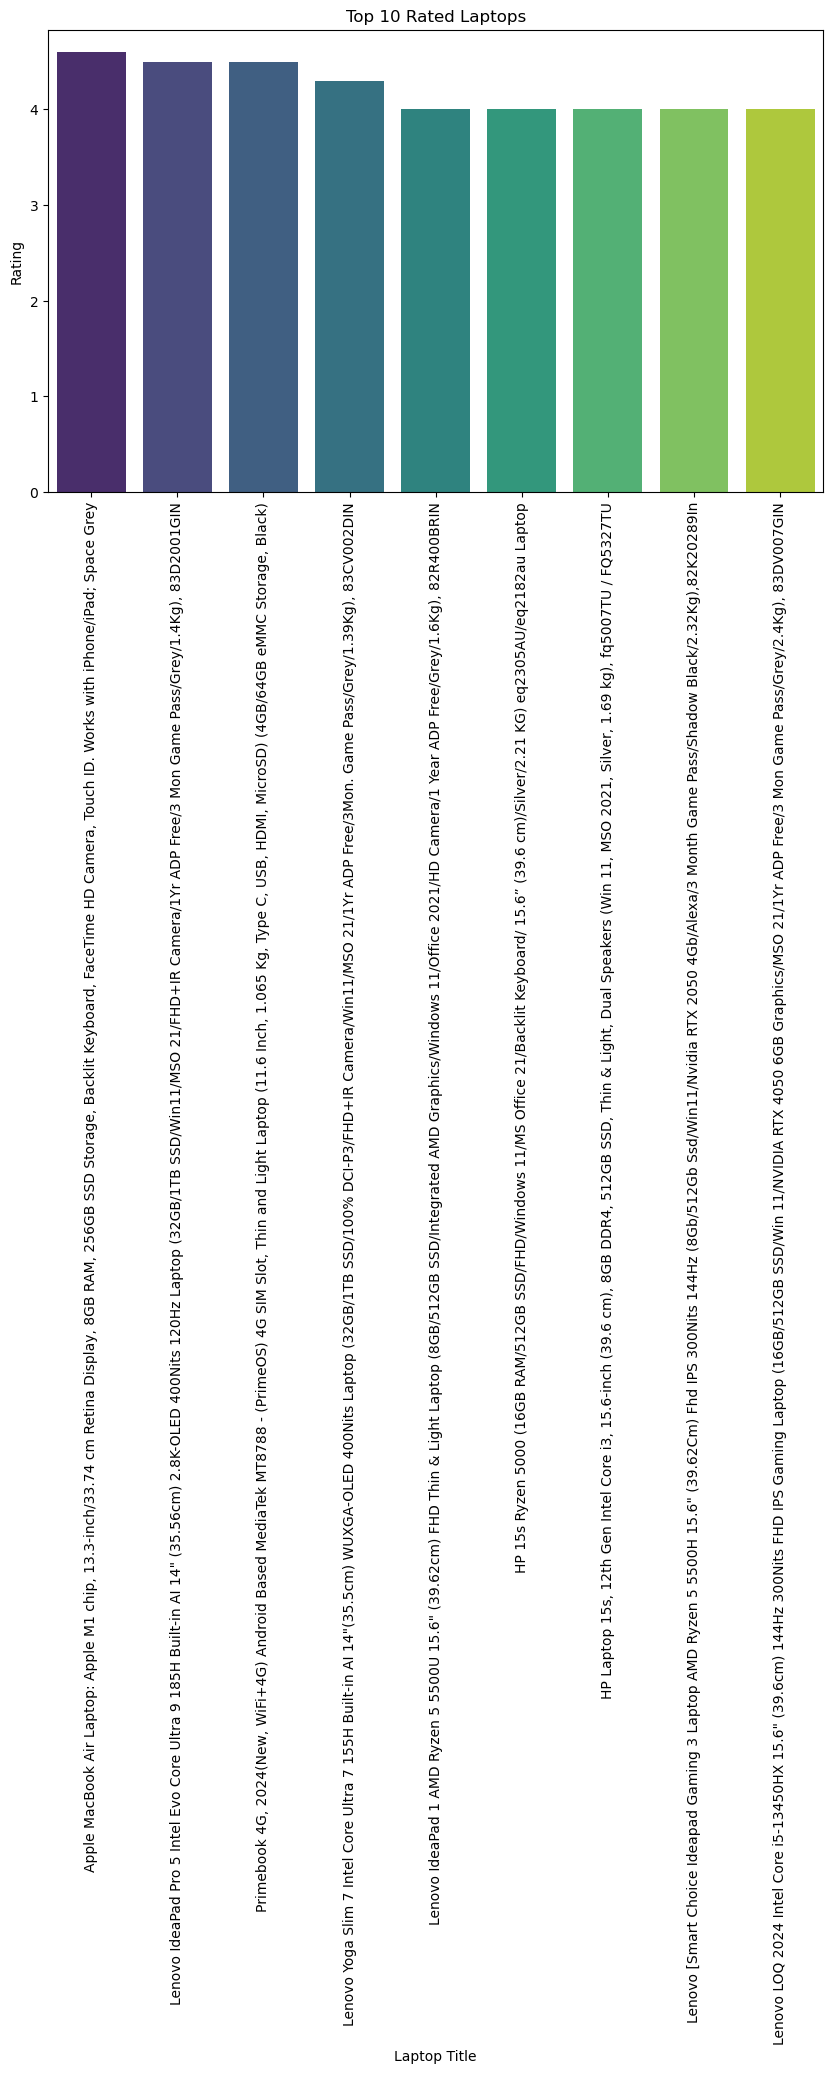

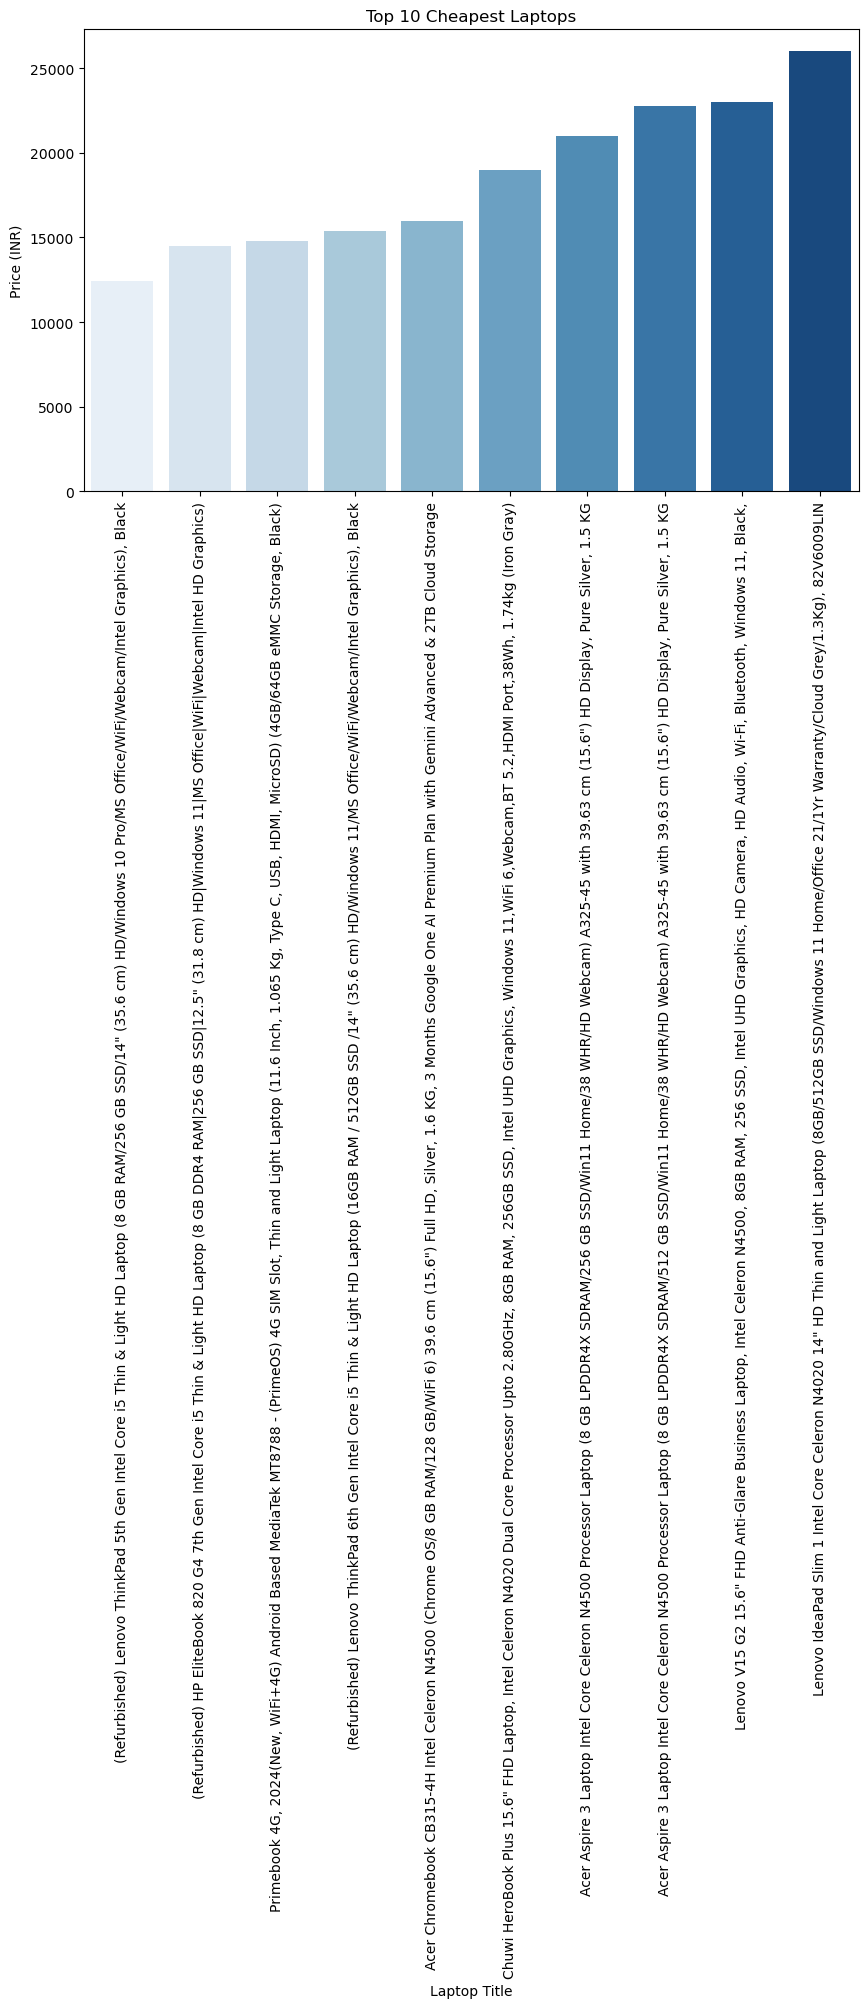

In [28]:

top_rated = amazon_df.sort_values('rating', ascending=False).head(10)
cheapest = amazon_df.sort_values('price').head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='rating', data=top_rated, palette='viridis')
plt.title('Top 10 Rated Laptops')
plt.xlabel('Laptop Title')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='price', data=cheapest, palette='Blues')
plt.title('Top 10 Cheapest Laptops')
plt.xlabel('Laptop Title')
plt.ylabel('Price (INR)')
plt.xticks(rotation=90)
plt.show()


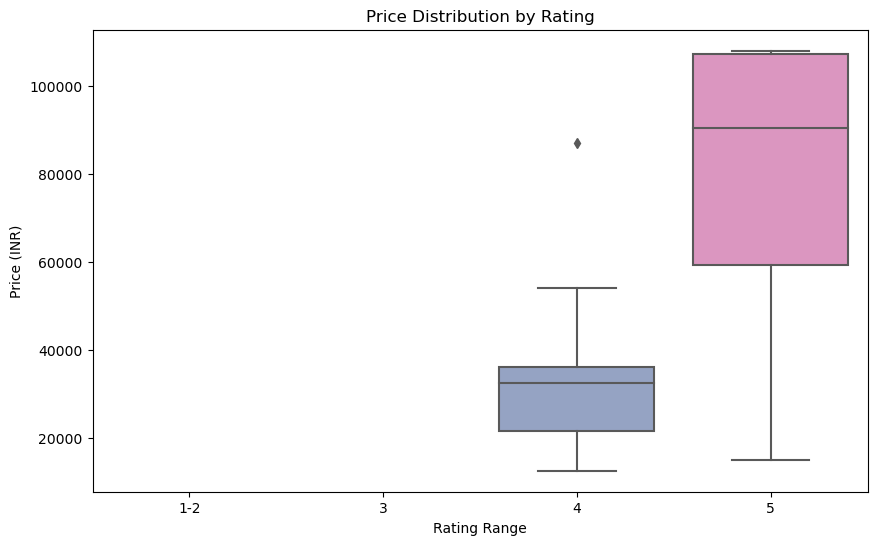

In [29]:

bins = [0, 2, 3, 4, 5]
labels = ['1-2', '3', '4', '5']
amazon_df['rating_bins'] = pd.cut(amazon_df['rating'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_bins', y='price', data=amazon_df, palette='Set2')
plt.title('Price Distribution by Rating')
plt.xlabel('Rating Range')
plt.ylabel('Price (INR)')
plt.show()


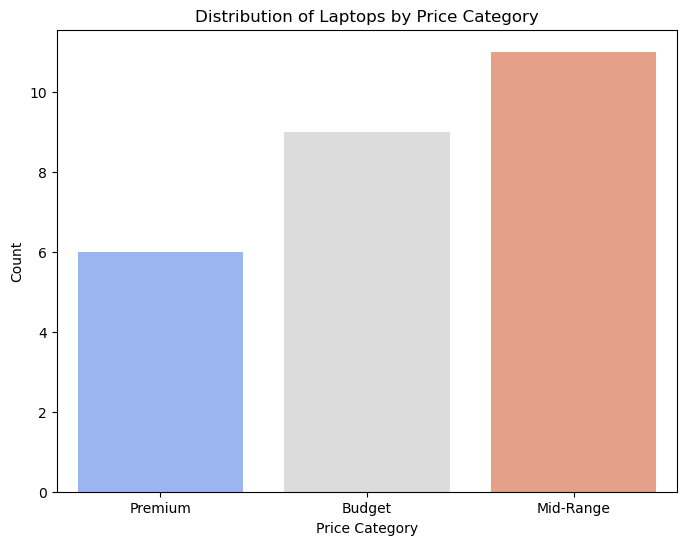

In [30]:

def categorize_price(price):
    if price < 25000:
        return 'Budget'
    elif price < 50000:
        return 'Mid-Range'
    else:
        return 'Premium'

amazon_df['price_category'] = amazon_df['price'].apply(categorize_price)


plt.figure(figsize=(8, 6))
sns.countplot(x='price_category', data=amazon_df, palette='coolwarm')
plt.title('Distribution of Laptops by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()


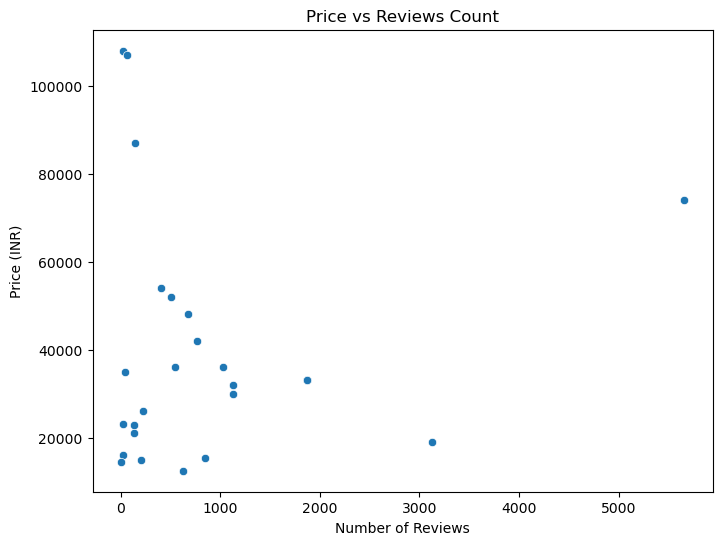

In [31]:

amazon_df['reviews_count'] = amazon_df['reviews'].apply(lambda x: int(x.split(' ')[0].replace(',', '')) if isinstance(x, str) else 0)


plt.figure(figsize=(8, 6))
sns.scatterplot(x='reviews_count', y='price', data=amazon_df)
plt.title('Price vs Reviews Count')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (INR)')
plt.show()


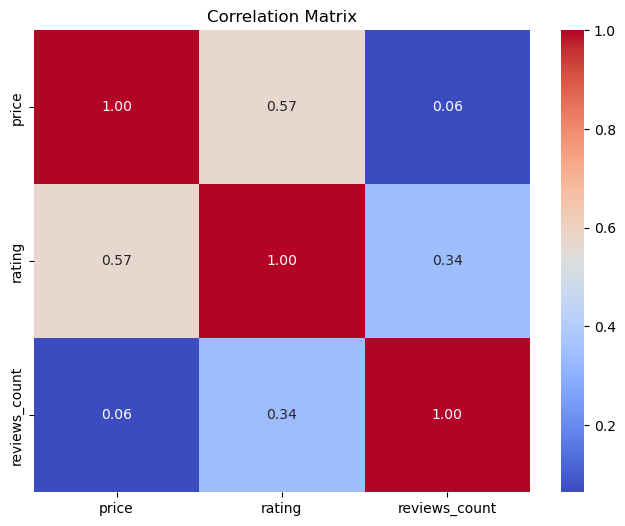

In [32]:

correlation_matrix = amazon_df[['price', 'rating', 'reviews_count']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
